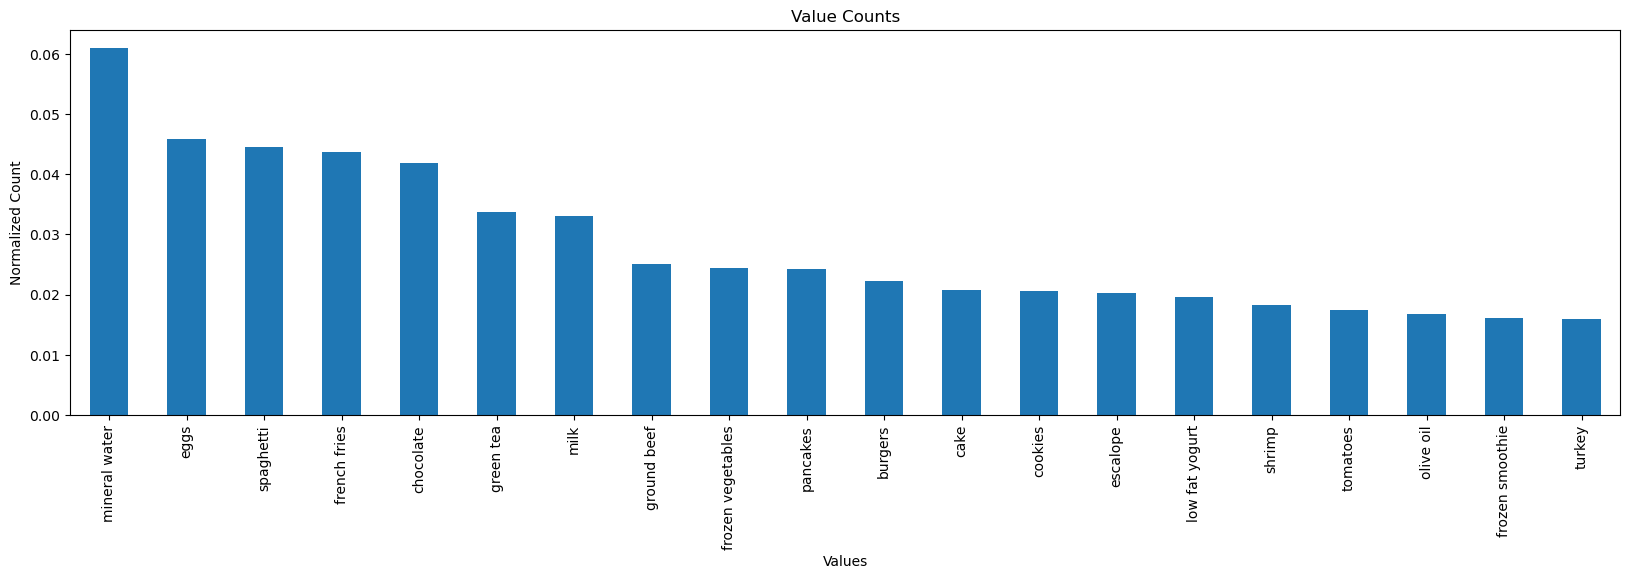

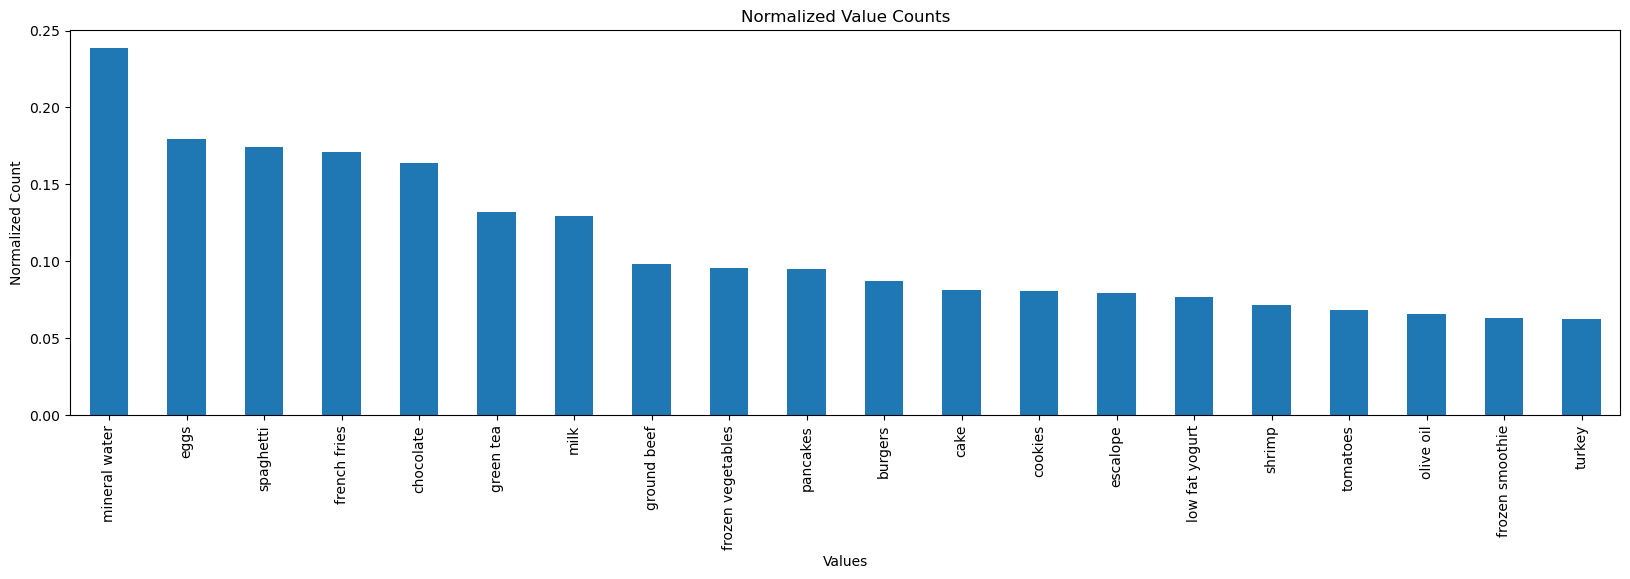

Выполнение apriori_python:

[{'mineral water'}, {'milk'}, 0.20134228187919462]
[{'mineral water'}, {'eggs'}, 0.21364653243847875]
[{'mineral water'}, {'chocolate'}, 0.220917225950783]
[{'mineral water'}, {'spaghetti'}, 0.2505592841163311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
Выполнение apyori:

frozenset() frozenset({'mineral water'})
Support: (0); Confidence: 0.23836821757099053; Lift: (2);

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: (0); Confidence: 0.3213995117982099; Lift: (2);

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: (0); Confidence: 0.220917225950783; Lift: (2);

frozenset({'eggs'}) frozenset({'mineral water'})
Support: (0); Confidence: 0.28338278931750743; Lift: (2);

frozenset({'mineral water'}) frozenset({

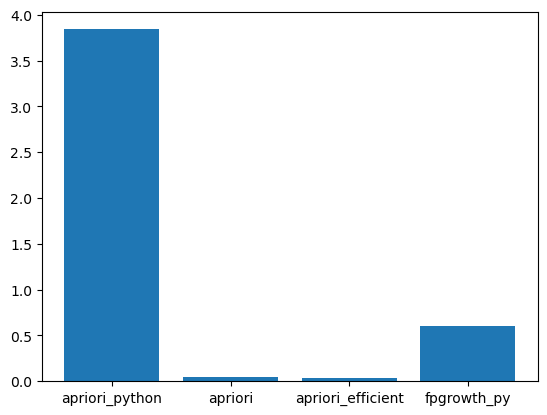

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori_python
from efficient_apriori import apriori as apriori_efficient
from fpgrowth_py import fpgrowth
from apyori import apriori
import time

data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

relative_frequency = data.stack().value_counts(normalize=True).nlargest(20)
plt.figure(figsize=(20, 5))
relative_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Value Counts')
plt.show()

actual_frequency = data.stack().value_counts().apply(lambda item: item / data.shape[0]).nlargest(20)
plt.figure(figsize=(20, 5))
actual_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Normalized Value Counts')
plt.show()

transactions = []
for i in range(data.shape[0]):
    row = data. iloc[i].dropna() .tolist()
    transactions.append(row)
    
t = []
start_1 = time.perf_counter()
t_1, rules_1 = apriori_python(transactions, minSup = 0.04, minConf = 0.2)
time_1 = (time.perf_counter()-start_1)
t.append(time_1)
print("Выполнение apriori_python:\n")
for i in range(len(rules_1)):
    print(rules_1[i])

        
start_2 = time.perf_counter()
rules_2 = apriori(transactions = transactions,
    min_support = 0.04,
    min_confidence = 0.2,
    min_1ift = 1.0001)
results = list(rules_2)
time_2 = (time.perf_counter()-start_2)
t.append(time_2)
print("Выполнение apyori:\n")
for result in results:
    for subset in result[2]:
        print (subset[0], subset[1])
        print ("Support: (0); Confidence: {1}; Lift: (2);".format(result[1], subset [2], subset[3]))
        print()
        
start_3 = time.perf_counter()
itemesets, rules_3 = apriori_efficient(transactions, min_support = 0.04, min_confidence = 0.2)
time_3 = (time.perf_counter()-start_3)
t.append(time_3)
print("Выполнение apriori_efficient:\n")
for i in range(len(rules_3)):
    print(rules_3[i])
    
start_4 = time.perf_counter()
itemsets, rules_4 = fpgrowth(transactions, minSupRatio = 0.04, minConf = 0.2)
time_4 = (time.perf_counter()-start_4)
t.append(time_4)

print("Выполнение fpgrowth_py:\n")
for i in range(len(rules_4)):
    print(rules_4[i])
    
print("Время выполнения apriori_python: ", t[0], "\n")
print("Время выполнения apriori: ", t[1], "\n")
print("Время выполнения apriori_efficient: ", t[2], "\n")
print("Время выполнения fpgrowth_py: ", t[3], "\n")
plt.bar(["apriori_python", "apriori", "apriori_efficient", "fpgrowth_py"], t)
plt.show()

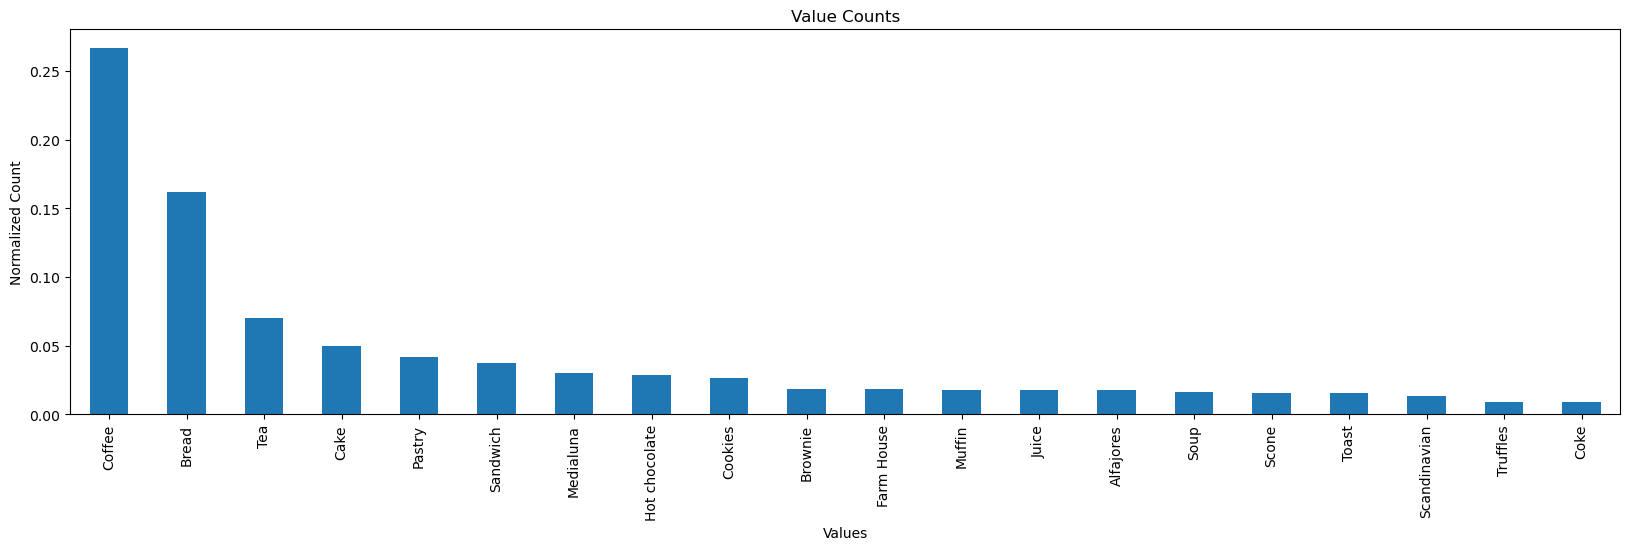

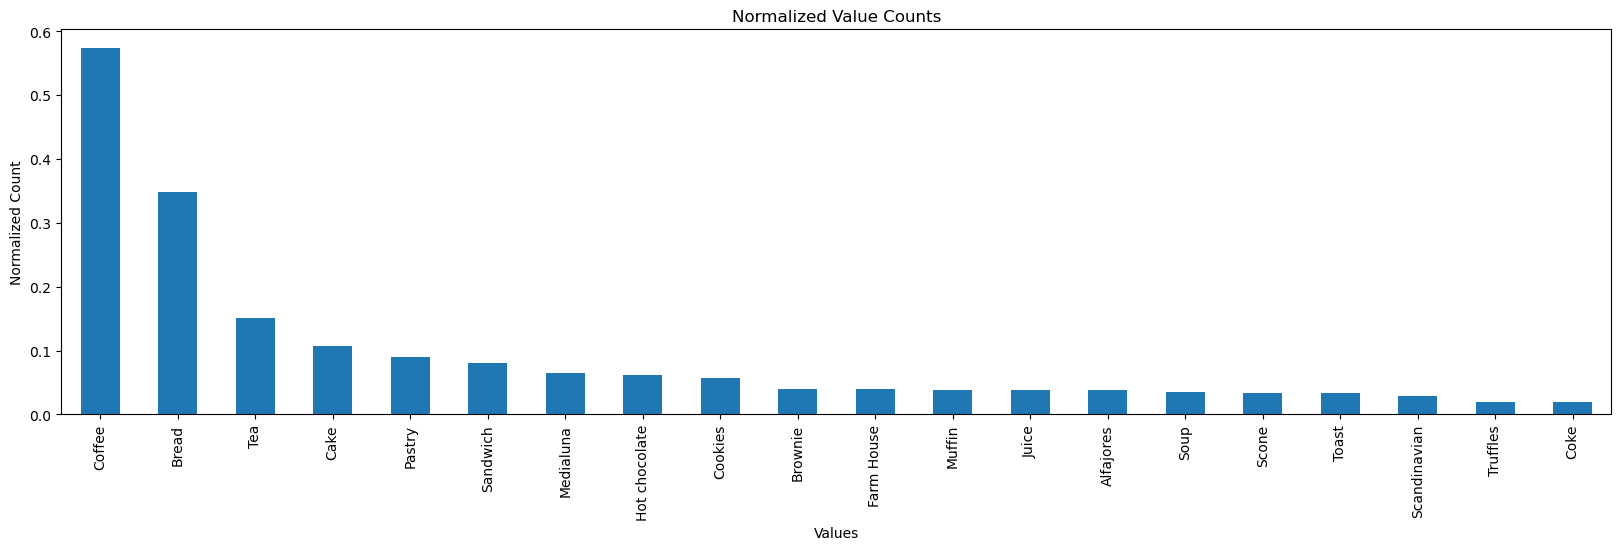

Применение алгоритма Apriori с помощью библиотеки apriori_python:

[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
Применение алгоритма Apriori с помощью библиотеки apyori:

frozenset() frozenset({'Bread'})
Support: (0); Confidence: 0.3249396705487357; Lift: (2);

frozenset() frozenset({'Coffee'})
Support: (0); Confidence: 0.4750813136082258; Lift: (2);

frozenset({'Pastry'}) frozenset({'Bread'})
Support: (0); Confidence: 0.3386503067484663; Lift: (2);

frozenset({'Cake'}) frozenset({'Coffee'})
Support: (0); Confidence: 0.5269582909460834; Lift: (2);

frozenset({'Cookies'}) frozenset({

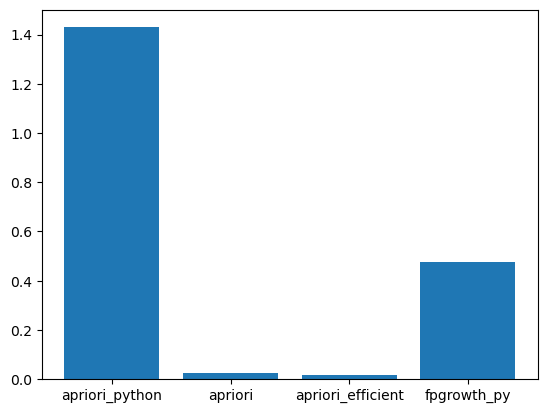

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori_python
from efficient_apriori import apriori as apriori_efficient
from fpgrowth_py import fpgrowth
from apyori import apriori
import time

# Загрузка данных
data = pd.read_csv('data.csv', header=None)

relative_frequency = data.stack().value_counts(normalize=True).nlargest(20)
plt.figure(figsize=(20, 5))
relative_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Value Counts')
plt.show()

actual_frequency = data.stack().value_counts().apply(lambda item: item / data.shape[0]).nlargest(20)
plt.figure(figsize=(20, 5))  # Adjust the width and height as needed
actual_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Normalized Value Counts')
plt.show()

transactions = []
for i in range(data.shape[0]):
    row = data. iloc[i].dropna() .tolist()
    transactions.append(row)
    
t = []
start_1 = time.perf_counter()
t_1, rules_1 = apriori_python(transactions, minSup = 0.02, minConf = 0.3)
time_1 = (time.perf_counter()-start_1)
t.append(time_1)
print("Применение алгоритма Apriori с помощью библиотеки apriori_python:\n")
for i in range(len(rules_1)):
    print(rules_1[i])

        
start_2 = time.perf_counter()
rules_2 = apriori(transactions = transactions,
    min_support = 0.02,
    min_confidence = 0.3,
    min_1ift = 1.0001)
results = list(rules_2)
time_2 = (time.perf_counter()-start_2)
t.append(time_2)
print("Применение алгоритма Apriori с помощью библиотеки apyori:\n")
for result in results:
    for subset in result[2]:
        print (subset[0], subset[1])
        print ("Support: (0); Confidence: {1}; Lift: (2);".format(result[1], subset [2], subset[3]))
        print()
        
start_3 = time.perf_counter()
itemesets, rules_3 = apriori_efficient(transactions, min_support = 0.02, min_confidence = 0.3)
time_3=(time.perf_counter()-start_3)
t.append(time_3)
print("Применение алгоритма Apriori с помощью библиотеки apriori_efficient:\n")
for i in range(len(rules_3)):
    print(rules_3[i])
    
start_4 = time.perf_counter()
itemsets, rules_3 = fpgrowth(transactions, minSupRatio = 0.03, minConf = 0.3)
time_4 = (time.perf_counter()-start_4)
t.append(time_4)

print("Применение алгоритма Apriori с помощью библиотеки fpgrowth_py:\n")
for i in range(len(rules_4)):
    print(rules_4[i])
    
print("Время выполнения apriori_python: ", t[0], "\n")
print("Время выполнения apriori: ", t[1], "\n")
print("Время выполнения apriori_efficient: ", t[2], "\n")
print("Время выполнения fpgrowth_py: ", t[3], "\n")
plt.bar(["apriori_python", "apriori", "apriori_efficient", "fpgrowth_py"], t)
plt.show()